<a href="https://colab.research.google.com/github/revanthpalla/DeepLearning/blob/main/Cyclesheet03/Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Palla Revanth

20MAI0046

GitHub:https://github.com/revanthpalla/DeepLearning.git

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_ds=tf.data.Dataset.from_tensor_slices((train_images,train_labels))
test_ds=tf.data.Dataset.from_tensor_slices((test_images,test_labels))

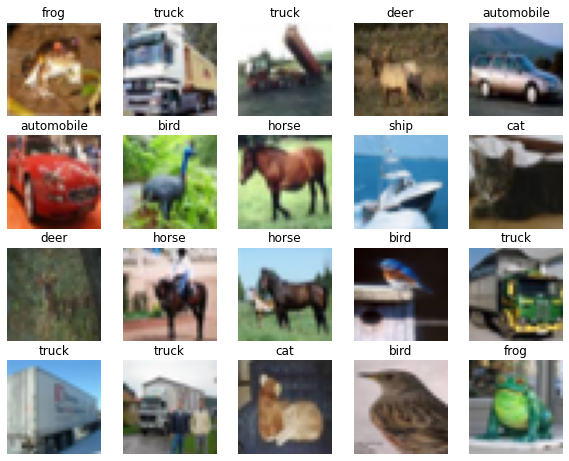

In [ ]:
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(train_ds.take(20)):
    #print(label)
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [ ]:
def process_image(image,label):
    image=tf.image.per_image_standardization(image)
    image=tf.image.resize(image,(64,64))
    
    return image,label

In [ ]:
train_ds_size=tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size=tf.data.experimental.cardinality(test_ds).numpy()
print('Train size:',train_ds_size)
print('Test size:',test_ds_size)

Train size: 50000
Test size: 10000


In [ ]:
train_ds=(train_ds
          .map(process_image)
          .shuffle(buffer_size=train_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )
test_ds=(test_ds
          .map(process_image)
          .shuffle(buffer_size=test_ds_size)
          .batch(batch_size=32,drop_remainder=True)
         )

In [ ]:
## build alexnet model
model=keras.models.Sequential()
x = keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3))
model.add(x)
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(3,3)))
model.add(keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10,activation='softmax'))


model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(lr=0.001),
    metrics=['accuracy']    
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 14, 14, 128)       46592     
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         819456    
_________________________________________________________________
batch_normalization_6 (Batch (None, 7, 7, 256)         1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 256)        

In [ ]:
history=model.fit(
    train_ds,
    epochs=4,
    validation_data=test_ds,
    validation_freq=1
)

Epoch 1/4
1562/1562 [==============================] - 573s 360ms/step - loss: 1.8045 - accuracy: 0.3452 - val_loss: 1.5462 - val_accuracy: 0.4434
Epoch 2/4
1562/1562 [==============================] - 529s 332ms/step - loss: 1.6610 - accuracy: 0.3985 - val_loss: 1.4683 - val_accuracy: 0.4724
Epoch 3/4
1562/1562 [==============================] - 520s 327ms/step - loss: 1.5467 - accuracy: 0.4396 - val_loss: 1.3830 - val_accuracy: 0.5098
Epoch 4/4
1562/1562 [==============================] - 523s 329ms/step - loss: 1.4572 - accuracy: 0.4729 - val_loss: 1.3347 - val_accuracy: 0.5224


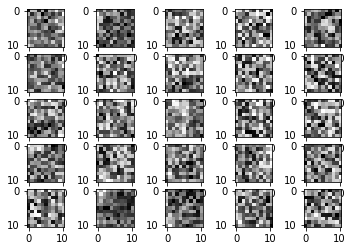

In [ ]:
x1w = x.get_weights()[0][:,:,0,:]

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

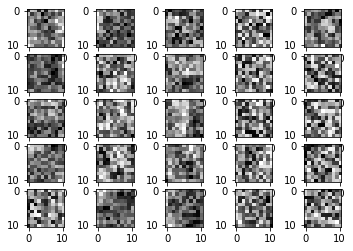

In [ ]:
x1w = x.get_weights()[0][:,:,0,:]

for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")
plt.show()

In [ ]:
# tesing accuracy
model.evaluate(test_ds)

312/312 [==============================] - 24s 73ms/step - loss: 1.3352 - accuracy: 0.5222


[1.3352223634719849, 0.5222355723381042]